## 1. Predicción de enfermedades cardíacas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./data/heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
X = data.drop('target', axis=1)
y = data['target']
print(X, y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

In [52]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  19.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  14.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  18.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  16.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  16.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.3s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=  12.8s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [53]:
print('Best parameters found:', grid.best_params_)
y_pred_grid = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_grid))

Best parameters found: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
[[102   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy: 1.0


In [48]:
import joblib

#joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(grid, './models/svm_model.pkl')
joblib.dump(scaler, './models/scaler.pkl')

['./models/scaler.pkl']

## 2.  Clasificación de pacientes según su riesgo

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [12]:
X = data.drop('target', axis=1)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

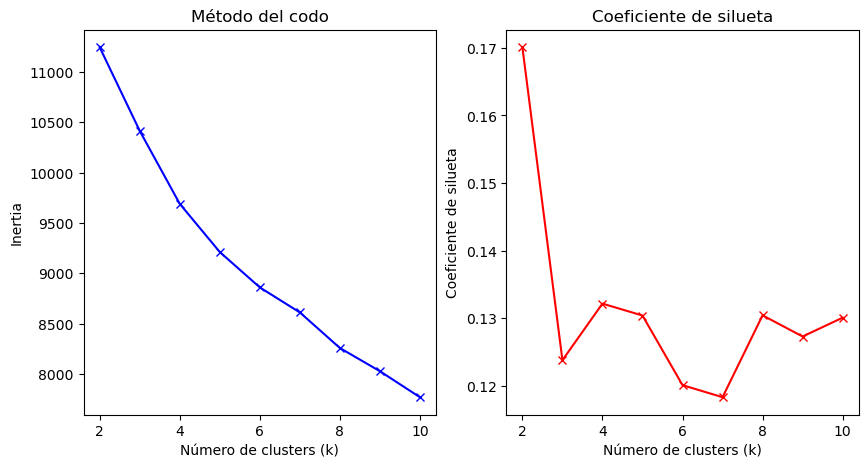

In [14]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del codo')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta')

plt.show()

In [15]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [16]:
data['cluster'] = kmeans.labels_

In [17]:
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        47.835859  0.866162  1.242424  125.845960  227.957071  0.060606   
1        59.351916  0.324042  1.470383  134.968641  259.829268  0.233449   
2        57.947368  0.809942  0.152047  135.470760  255.286550  0.181287   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        0.694444  164.977273  0.126263  0.511869  1.709596  0.497475   
1        0.421603  150.278746  0.153310  0.741463  1.428571  0.358885   
2        0.429825  129.769006  0.733918  1.996491  0.973684  1.383041   

             thal    target  
cluster                      
0        2.338384  0.714646  
1        1.975610  0.759582  
2        2.599415  0.073099  


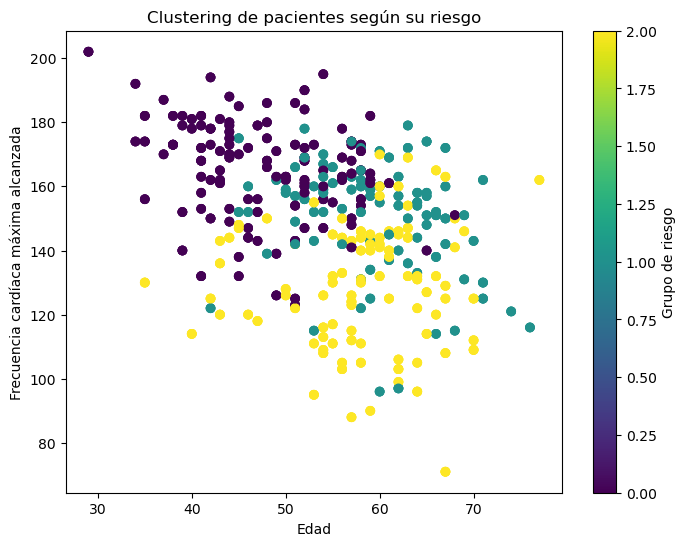

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['thalach'], c=data['cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima alcanzada')
plt.title('Clustering de pacientes según su riesgo')
plt.colorbar().set_label('Grupo de riesgo')
plt.show()

#### 2.2 PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
X = data.drop('cluster', axis=1)
pca = PCA(n_components=2, random_state=42)
X_2D = pca.fit_transform(X)

In [21]:
data['pca-2d-one'] = X_2D[:, 0]
data['pca-2d-two'] = X_2D[:, 1]

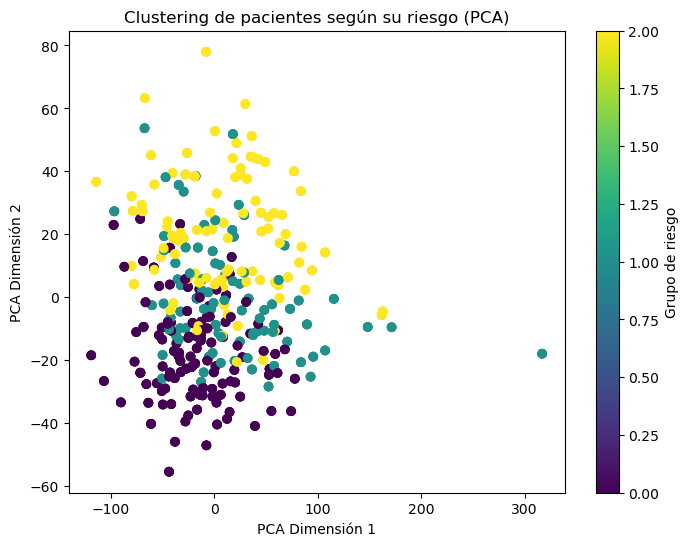

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(data['pca-2d-one'], data['pca-2d-two'], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA Dimensión 1')
plt.ylabel('PCA Dimensión 2')
plt.title('Clustering de pacientes según su riesgo (PCA)')
plt.colorbar().set_label('Grupo de riesgo')
plt.show()

In [23]:
# Elimina las columnas adicionales creadas para t-SNE y PCA
data_original = data.drop(['cluster', 'pca-2d-one', 'pca-2d-two'], axis=1, errors='ignore')

# Obtén los nombres de las características originales sin la columna 'cluster'
feature_names = data_original.columns

# Crea un DataFrame con la matriz de componentes y los nombres de las características
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])

# Imprime el DataFrame de componentes
components_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
PC1,0.040912,-0.001774,-0.001656,0.049635,0.997823,0.000212,-0.001533,-0.013976,0.000651,0.001625,-0.000238,0.001575,0.001225,-0.001028
PC2,0.175053,0.000926,-0.013024,0.085011,-0.025221,0.000412,-0.001259,-0.980118,0.007581,0.018210,-0.010618,0.009832,0.002615,-0.009180


#### 2.3 Análisis de importancia de características

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [25]:
X = data_original
y = data['target']

In [26]:
k = 5
selector = SelectKBest(f_classif, k=k)
X_best = selector.fit_transform(X, y)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [27]:
selected_features = feature_names[selector.get_support()]
print('Las', k, 'mejores características son:', selected_features)

Las 5 mejores características son: Index(['cp', 'thalach', 'exang', 'oldpeak', 'target'], dtype='object')


In [28]:
feature_scores = selector.scores_
score_df = pd.DataFrame({'feature': feature_names, 'score': feature_scores})
score_df = score_df.sort_values('score', ascending=False)

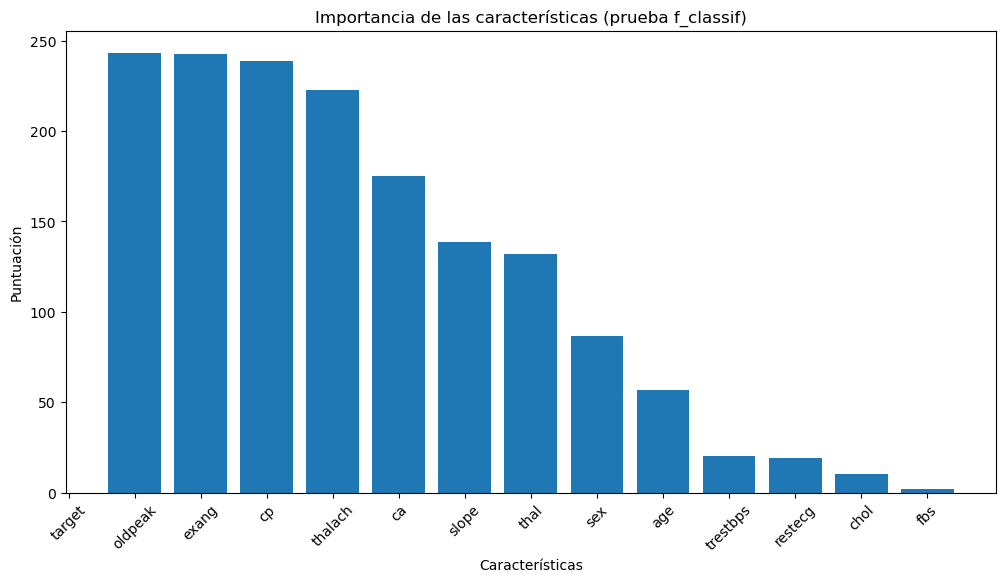

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(score_df['feature'], score_df['score'])
plt.xlabel('Características')
plt.xticks(rotation=45)
plt.ylabel('Puntuación')
plt.title('Importancia de las características (prueba f_classif)')
plt.show()

3. Análisis de sensibilidad e incertidumbre

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
def simulate_variation(X, std_dev=0.1):
    return X + np.random.normal(0, std_dev, X.shape)

In [33]:
n_iterations = 1000
accuracy_list = []

for i in range(n_iterations):
    X_test_simulated = simulate_variation(X_test, std_dev=0.1)
    y_pred = clf.predict(X_test_simulated)
    accuracy = (y_pred == y_test).mean()
    accuracy_list.append(accuracy)

mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

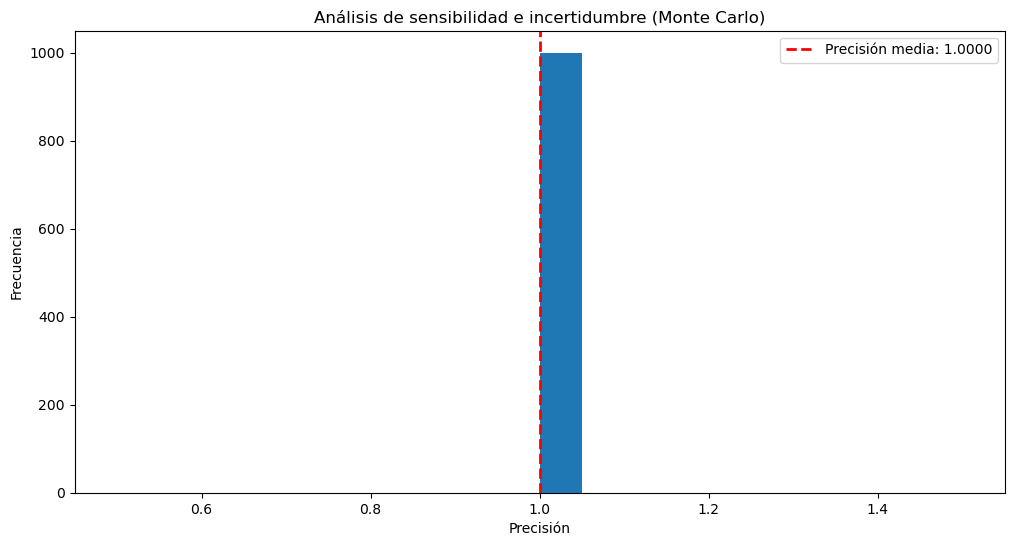

In [34]:
plt.figure(figsize=(12, 6))
plt.hist(accuracy_list, bins=20)
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')
plt.title('Análisis de sensibilidad e incertidumbre (Monte Carlo)')
plt.axvline(mean_accuracy, color='r', linestyle='dashed', linewidth=2, label=f'Precisión media: {mean_accuracy:.4f}')
plt.legend()
plt.show()

### 4. Análisis de interacción entre características

In [35]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_matrix = data[numeric_features].corr()

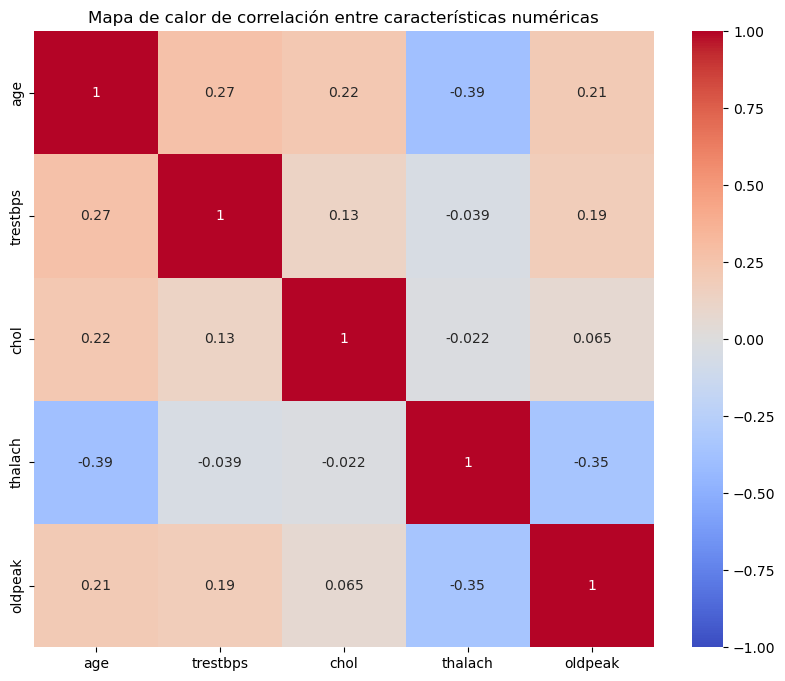

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación entre características numéricas')
plt.show()

In [38]:
data_discretized = data.copy()

for feature in numeric_features:
    data_discretized[feature] = pd.qcut(data[feature], q=2, labels=['low', 'high'])

data_discretized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,pca-2d-one,pca-2d-two
0,low,1,0,low,low,0,1,high,0,high,2,2,3,0,0,-34.614584,-18.620765
1,low,1,0,high,low,1,0,high,1,high,0,0,3,0,2,-42.624731,-4.152950
2,high,1,0,high,low,0,1,low,1,high,0,0,3,0,2,-70.201203,29.372193
3,high,1,0,high,low,0,1,high,0,low,2,1,3,0,0,-41.990546,-8.030254
4,high,0,0,high,high,1,1,low,0,high,1,3,2,0,2,49.131824,42.967795


In [39]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [40]:
transactions = data_discretized.apply(lambda row: [f'{col}={row[col]}' for col in data_discretized.columns], axis=1).tolist()

In [41]:
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)
transaction_df = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

In [42]:
min_support = 0.1
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

In [43]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules.sort_values('confidence', ascending=False)

In [ ]:
target_rules = rules[rules['consequents'].apply(lambda x: 'target=0' in x or 'target=1' in x)]
target_rules